# Imbalance Dataset Problem
One of the most common difference between real world data and "fake data" is most of the datasets in real world are 
highly imbalanced. In this notebook, we will learn some of the techniques 

## Sampling

1. Random Undersampling
2. Random Oversampling
3. SMOTE

## Performance Metrics
1. ROCAUC

## Penalized algorithms
1. 

## Random Forest
1. 

In [50]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

## Loading the Balance Scale Dataset
Let's the load the balance scale dataset taken from UCI as source

Target variable:

The target variable has 3 classes.

R for right-heavy, i.e. when var3 * var4 > var1 * var2
L for left-heavy, i.e. when var3 * var4 < var1 * var2
B for balanced, i.e. when var3 * var4 = var1 * var2

In [51]:
##load data
bs_data = pd.read_csv("data/balance-scale.data")

We can also open the webpage to know more about this dataset

In [52]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/datasets/balance+scale', width=1200, height=600)

## Explore the dataset
The data is now been loaded to a pandas dataframe, let's try to understand the data a bit more before starting with undersampling

In [53]:
##Check the dataset
bs_data.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


Let's now rename the columns to more sensible ones. We can rename the column names as "balance", "leftWeight", 
"leftDistance", "rightWeight" and "rightDistance"

In [54]:
##Rename columns
bs_data.columns = ["label", "leftWeight", "leftDistance", "rightWeight", "rightDistance"]

As we have learned in our previous notebooks, to get more information about variables we can use df.describe()

In [55]:
bs_data.describe()

,leftWeight,leftDistance,rightWeight,rightDistance
count,624.000000,624.000000,624.000000,624.000000
mean,3.003205,3.003205,3.003205,3.003205
std,1.414210,1.414210,1.414210,1.414210
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [56]:
### Check distibution of label
target_column = 'label'
bs_data[target_column].value_counts()

R    288
L    288
B     48
Name: label, dtype: int64

## Transform into binary classification problem
For this tutorial, let's turn this into a binary classification problem. 
Label:1 -- Implies balanced scale
Label:0 -- Implies imbalanced scale

In [57]:
bs_data['label'] = [1 if b=='B' else 0 for b in bs_data.label]
bs_data[target_column].value_counts()

0    576
1     48
Name: label, dtype: int64

In [58]:
##Quick Null Value Analysis
bs_data.isnull().sum().max()

0

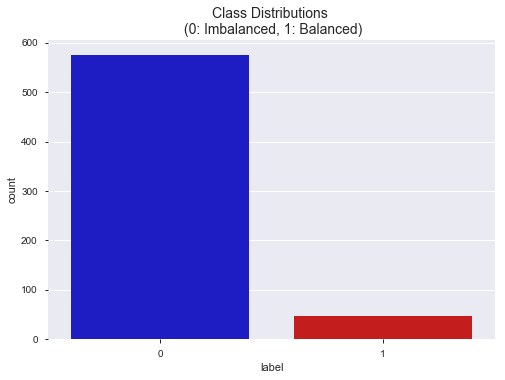

In [59]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('label', data=bs_data, palette=colors)
plt.title('Class Distributions \n (0: Imbalanced, 1: Balanced)', fontsize=14)
plt.show()

# Train a model with imbalanced data
Let's train a simple logistic regression model with this data as input and understand the importance of treating imbalanced data differently

AttributeError: module 'numpy' has no attribute 'printoptions'